In [1]:
library("Seurat")
library("tidyverse")
library("cowplot")
library("patchwork")

Loading required package: SeuratObject

Loading required package: sp

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, saveRDS


Loading Seurat v5 beta version 
To maintain compatibility with previous workflows, new Seurat objects will use the previous object structure by default
To use new Seurat v5 assays: Please run: options(Seurat.object.assay.version = 'v5')

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [2]:
library(ggalluvial)
library(dplyr)

In [3]:
library('ggplot2')

In [4]:
TeO_GABA <- readRDS('/data/work/5month_TeO/10_TeO_GABA_unannotation.rds')
TeO_GABA

An object of class Seurat 
18448 features across 17369 samples within 2 assays 
Active assay: RNA (16448 features, 0 variable features)
 2 layers present: counts, data
 1 other assay present: integrated
 2 dimensional reductions calculated: pca, umap

In [5]:
TeO_GABA

An object of class Seurat 
18448 features across 17369 samples within 2 assays 
Active assay: RNA (16448 features, 0 variable features)
 2 layers present: counts, data
 1 other assay present: integrated
 2 dimensional reductions calculated: pca, umap

In [6]:
Idents(TeO_GABA) <- TeO_GABA$`Sample_ID`

In [7]:
# Data preprocessing and dimensionality reduction
budgerigar_brain_obj_list <- SplitObject(TeO_GABA, split.by = "Sample_ID")

# NormalizeData
for (name in names(budgerigar_brain_obj_list)) {

    budgerigar_brain_obj_list[[name]] <- NormalizeData(budgerigar_brain_obj_list[[name]], normalization.method = "LogNormalize", assay = "RNA")

    budgerigar_brain_obj_list[[name]] <- FindVariableFeatures(budgerigar_brain_obj_list[[name]], assay = "RNA", nfeatures = 2000, selection.method = "vst")
}

Warning message:
“The following arguments are not used: nselect”
Warning message:
“The following arguments are not used: nselect”
Warning message:
“The following arguments are not used: nselect”
Warning message:
“The following arguments are not used: nselect”


In [8]:
integrated_features <- SelectIntegrationFeatures(object.list = budgerigar_brain_obj_list)

budgerigar_brain_obj_list <- lapply(X = budgerigar_brain_obj_list, FUN = function(x) {
    x <- ScaleData(x, features = integrated_features, verbose = FALSE)
    x <- RunPCA(x, features = integrated_features, verbose = FALSE)
})


In [9]:
####rpca
anchors <- FindIntegrationAnchors(object.list = budgerigar_brain_obj_list, anchor.features = integrated_features, reduction = "rpca")

TeO_GABA <- IntegrateData(anchorset = anchors, normalization.method = "LogNormalize")

Scaling features for provided objects

Computing within dataset neighborhoods

Finding all pairwise anchors

Warning message:
“`invoke()` is deprecated as of rlang 0.4.0.
Please use `exec()` or `inject()` instead.
This warning is displayed once every 8 hours.”
Warning message:
“Different cells and/or features from existing assay RNA”
Warning message:
“Different cells and/or features from existing assay RNA”
Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 774 anchors

Warning message:
“Different cells and/or features from existing assay RNA”
Warning message:
“Different cells and/or features from existing assay RNA”
Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 749 anchors

Warning message:
“Different cells and/or features from existing assay RNA”
Warning message:
“Different cells and/or features from existing assay RNA”
Projecting new data onto SVD

Projecting new data

In [10]:
# Scale data (default: only for variable features)
variable_feature <- rownames(TeO_GABA)

In [11]:
TeO_GABA <- ScaleData(TeO_GABA, features = variable_feature, vars.to.regress = c("nCount_RNA"))

Regressing out nCount_RNA

Centering and scaling data matrix



In [ ]:
options(repr.plot.width = 9, repr.plot.height = 9)
DefaultAssay(TeO_GABA) <- "integrated"

# PCA

TeO_GABA <- RunPCA(TeO_GABA, assay = "integrated", verbose = T) 

PC_ 1 
Positive:  ENSMUNG00000013450, ENSMUNG00000013449, SEMA3E, SVEP1, SLC24A2, ENSMUNG00000003056, CEMIP, ENSMUNG00000005044, MEIS2, ENSMUNG00000010953 
	   TRPC7, CACNA1G, ENSMUNG00000013281, CORIN, CCDC85A, ENSMUNG00000009759, ENSMUNG00000010389, LUZP2, ENSMUNG00000006766, GRIA1 
	   ABI3BP, CHST9, ENSMUNG00000011969, ADGRB1, MAGI3, DOCK4, ENSMUNG00000001940, ENSMUNG00000007222, PTPRF, DLG5 
Negative:  GRIA3, TENM3, ENSMUNG00000010577, GRIK2, TENM2, GALNTL6, ZEB2, ADGRB3, IQCJ, ENSMUNG00000005123 
	   C8orf34, NR3C2, EMX2, PTPRK, SHISA9, GALNT7, SLC35F3, EFNA5, GRM8, CHL1 
	   STK32B, NDNF, PDE7B, TAFA2, NFIB, ADCY2, DCC, SLIT2, EPHA5, CDH10 
PC_ 2 
Positive:  GRM8, ENSMUNG00000008440, SHOX2, ZFPM2, ENSMUNG00000004959, RSPO3, KCNQ5, ENSMUNG00000006766, ADAMTSL1, GRIK2 
	   TAFA2, ENSMUNG00000009092, LRP1B, NFIB, CALD1, SATB1, ADGRB3, CHL1, CRIM1, TRPM3 
	   TENM3, PRKG1, DSCAM, CA2, COL12A1, ADGRA1, IL1RAPL1, UNC13C, CDH8, BRSK2 
Negative:  NDNF, DACH1, ENSMUNG00000005153, GATA2, 

In [ ]:
TeO_GABA <- FindNeighbors(TeO_GABA, dims = 1:40, reduction = "pca")

Computing nearest neighbor graph

Computing SNN



Loading required package: ggraph


Attaching package: ‘ggraph’


The following object is masked from ‘package:sp’:

    geometry


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
14:55:23 UMAP embedding parameters a = 0.9922 b = 1.112

14:55:23 Read 17369 rows and found 40 numeric columns

14:55:23 Using Annoy for neighbor search, n_neighbors = 30

14:55:23 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:55:25 Writing NN index file to temp file /tmp/RtmpMSXbvd/file1c727f3c0a8

14:55:25 Searching Annoy index using 1 thread, search_k 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 17369
Number of edges: 814337

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9325
Number of communities: 20
Elapsed time: 3 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 17369
Number of edges: 814337

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9115
Number of communities: 23
Elapsed time: 3 seconds


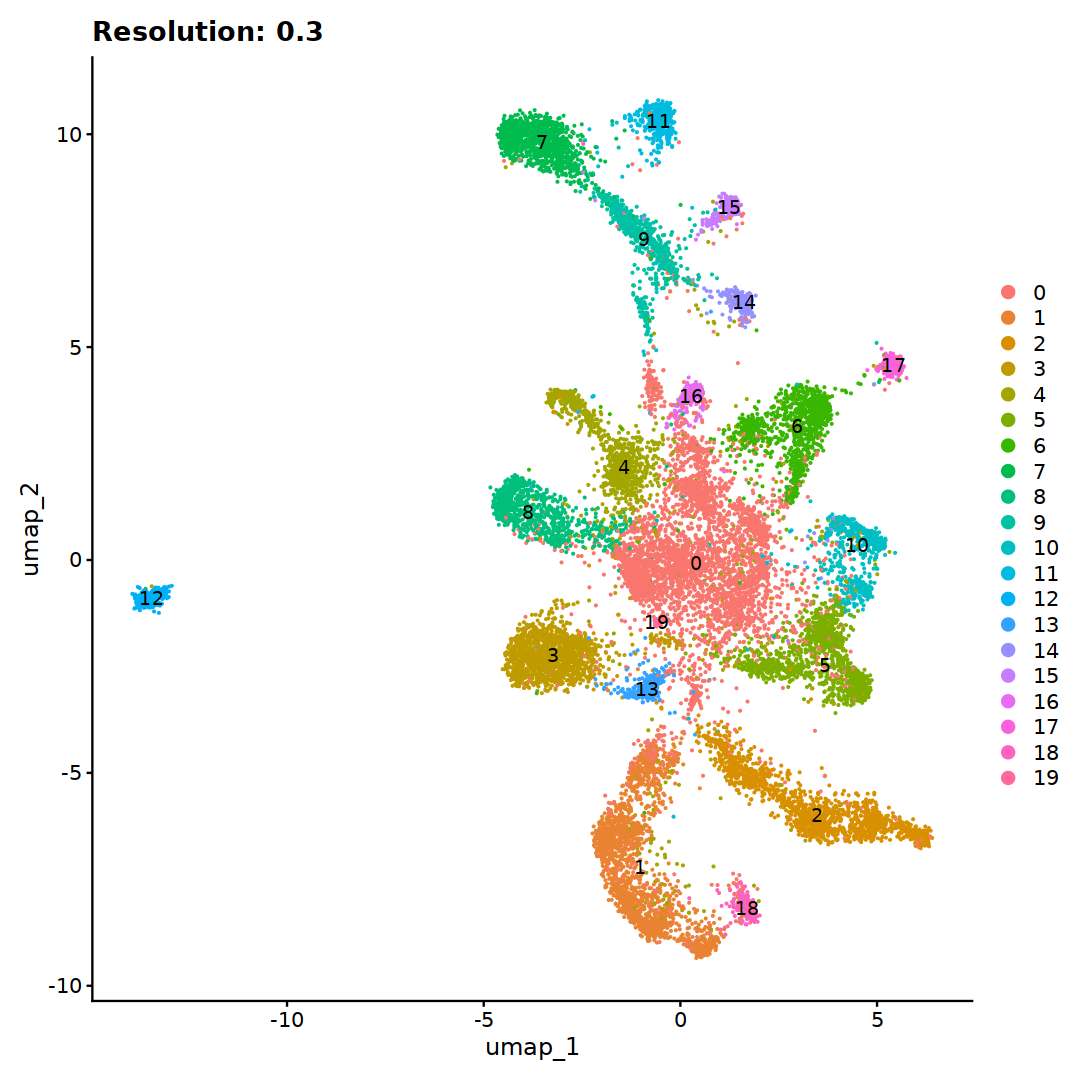

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 17369
Number of edges: 814337

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8935
Number of communities: 25
Elapsed time: 3 seconds


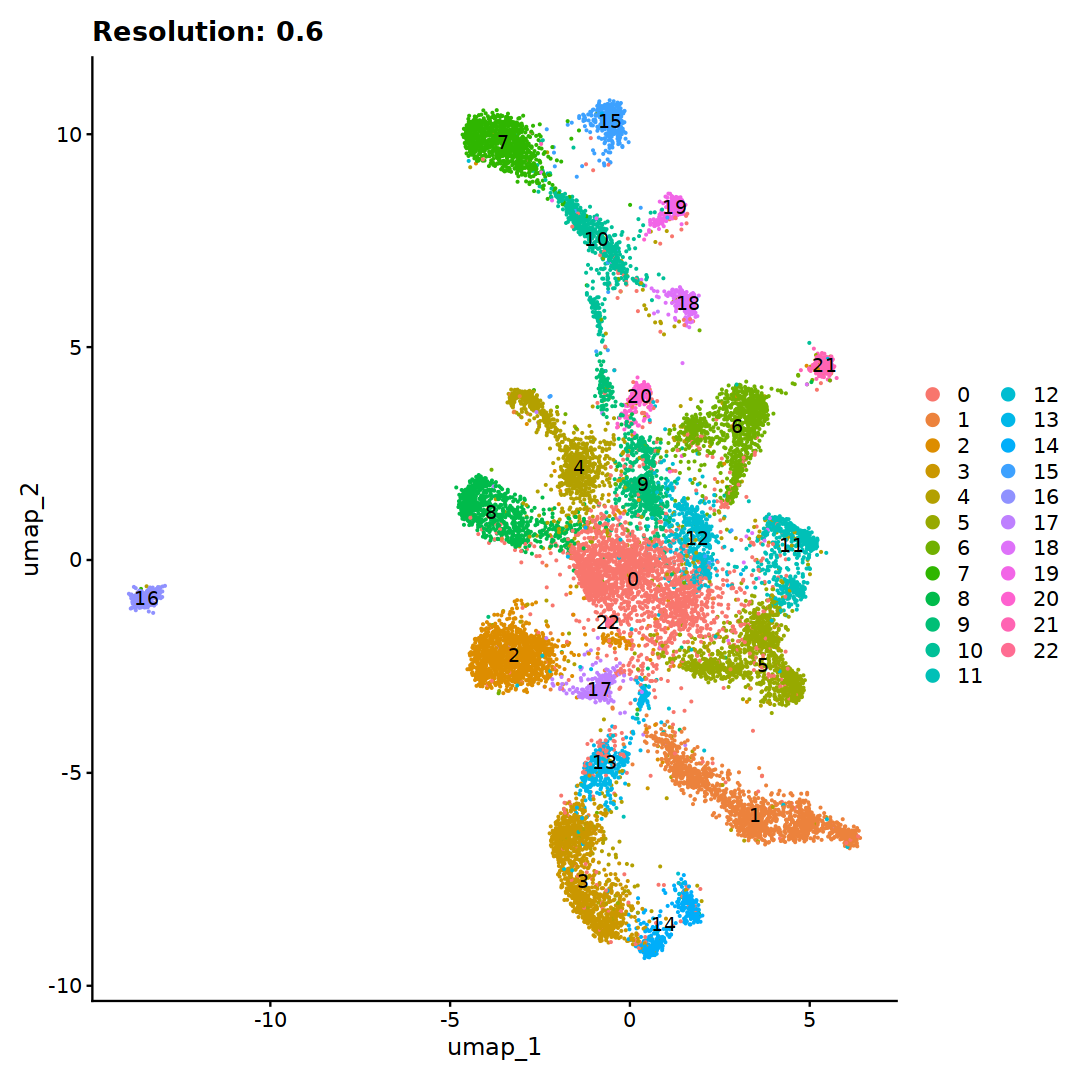

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 17369
Number of edges: 814337

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8883
Number of communities: 25
Elapsed time: 3 seconds


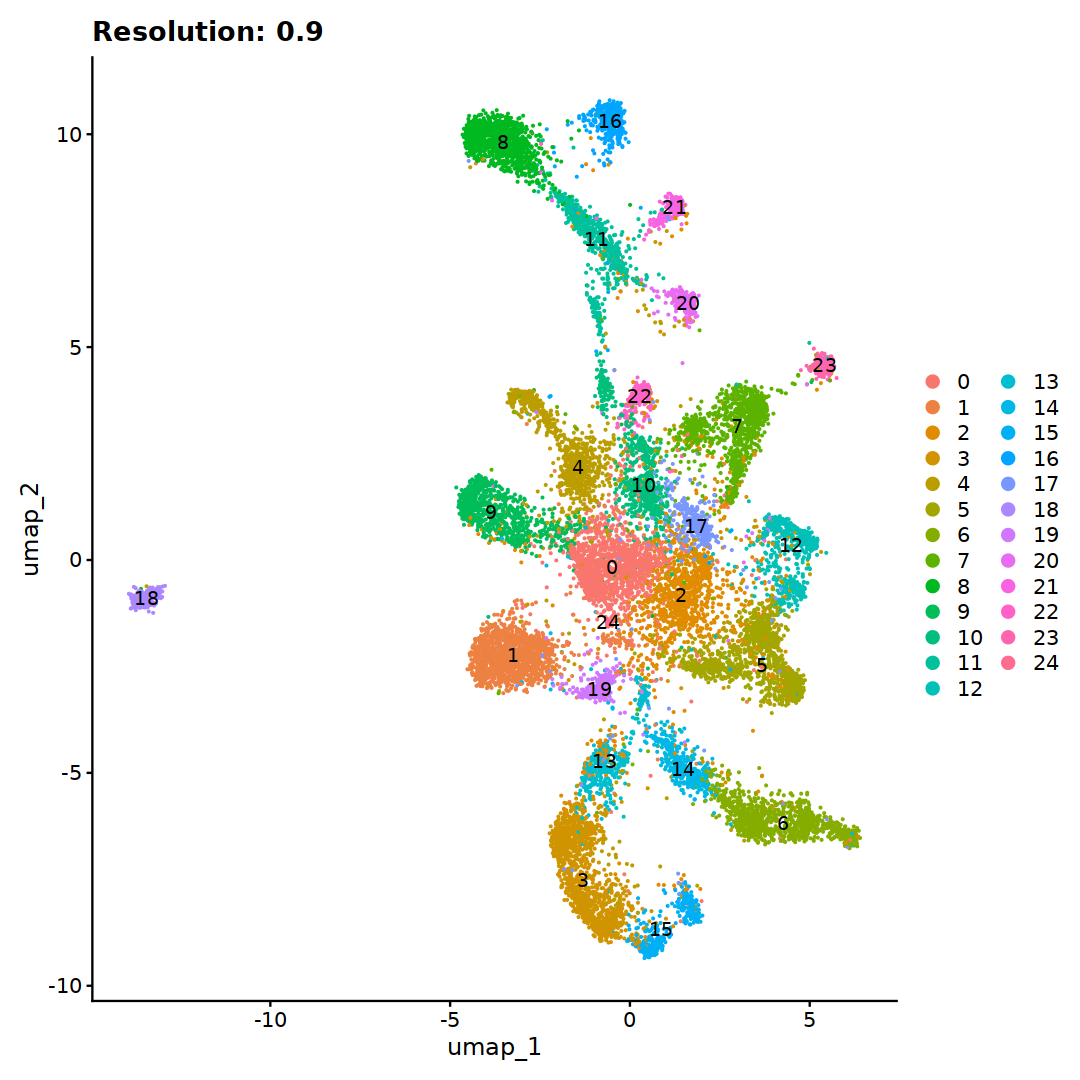

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 17369
Number of edges: 814337

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8783
Number of communities: 29
Elapsed time: 3 seconds


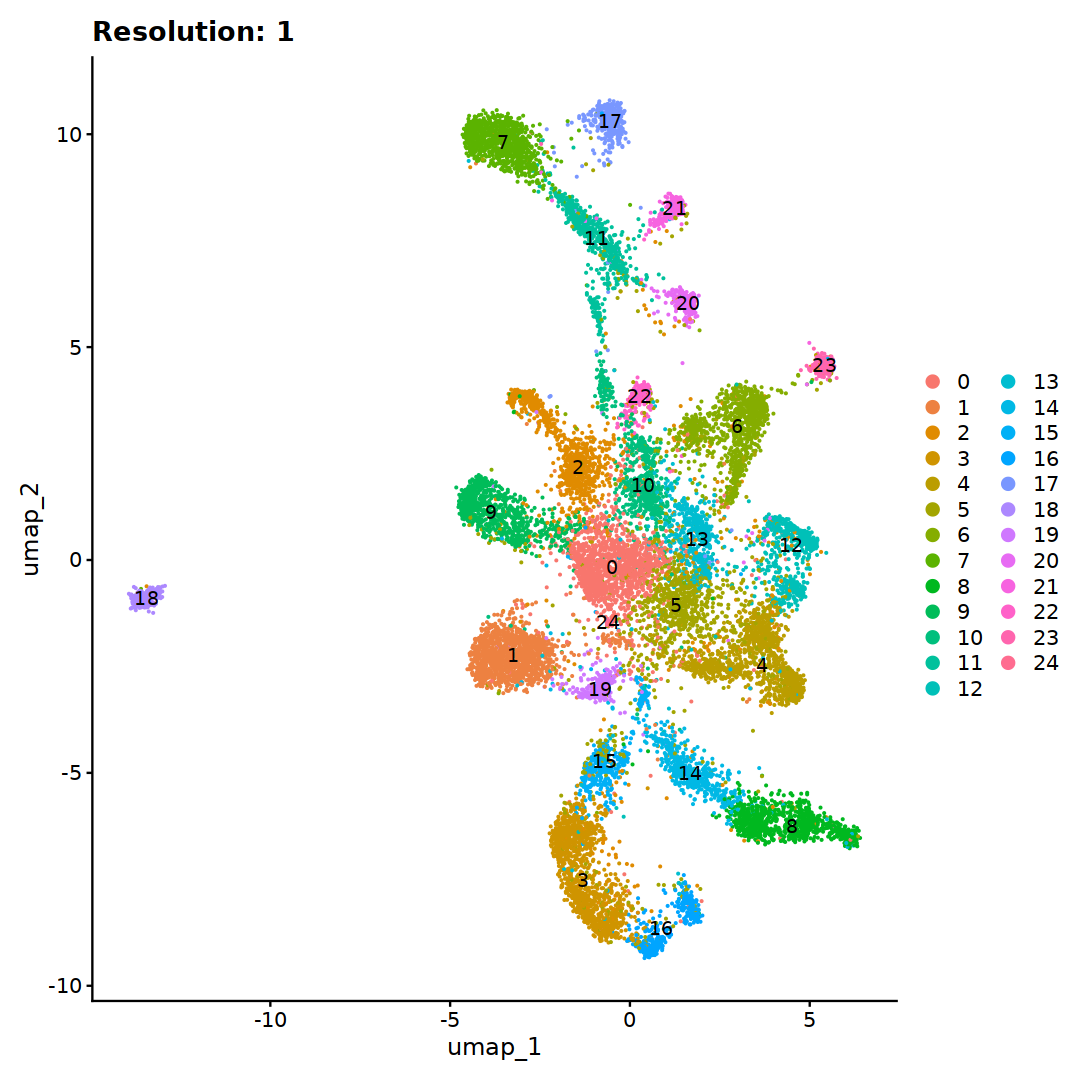

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 17369
Number of edges: 814337

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8644
Number of communities: 30
Elapsed time: 3 seconds


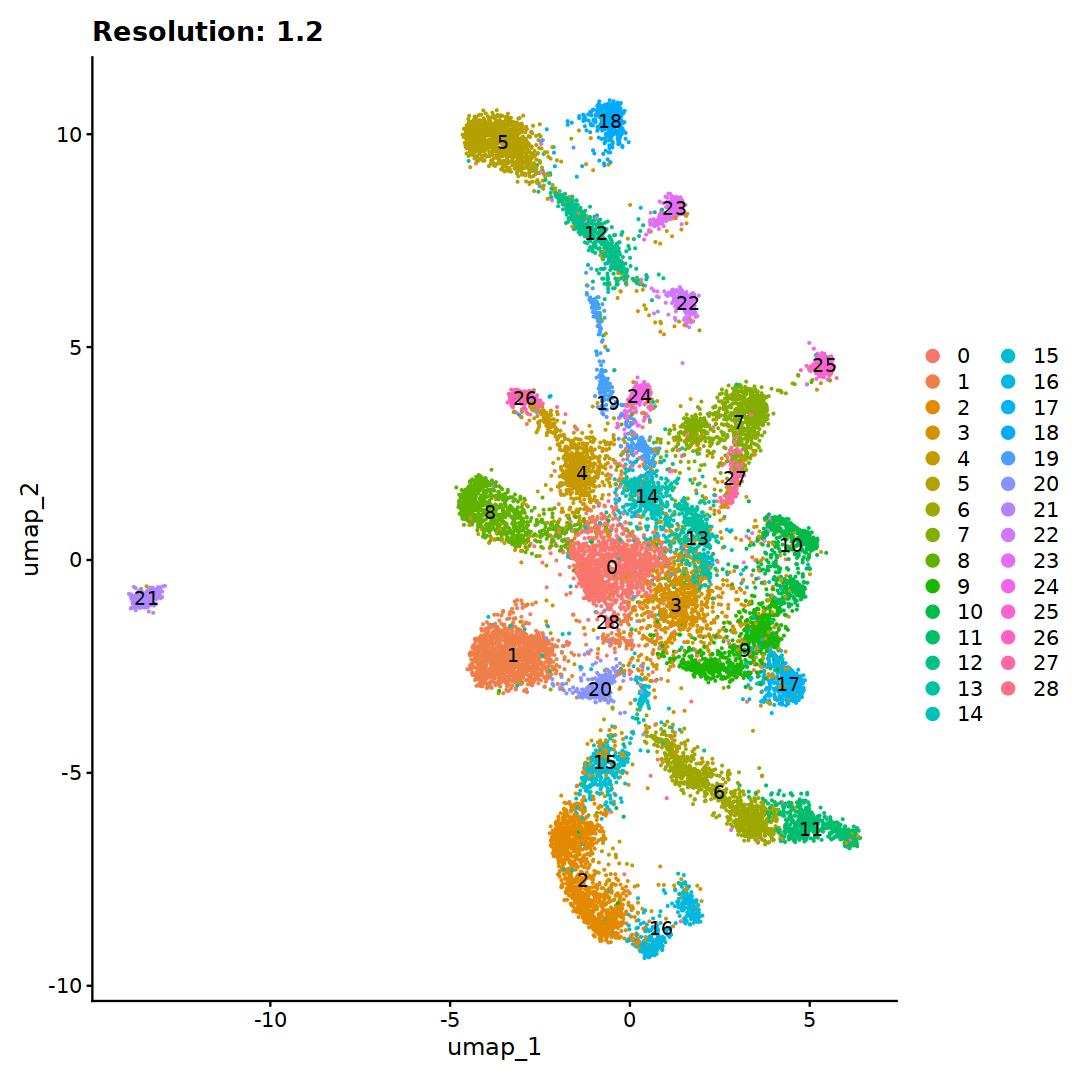

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 17369
Number of edges: 814337

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8515
Number of communities: 33
Elapsed time: 3 seconds


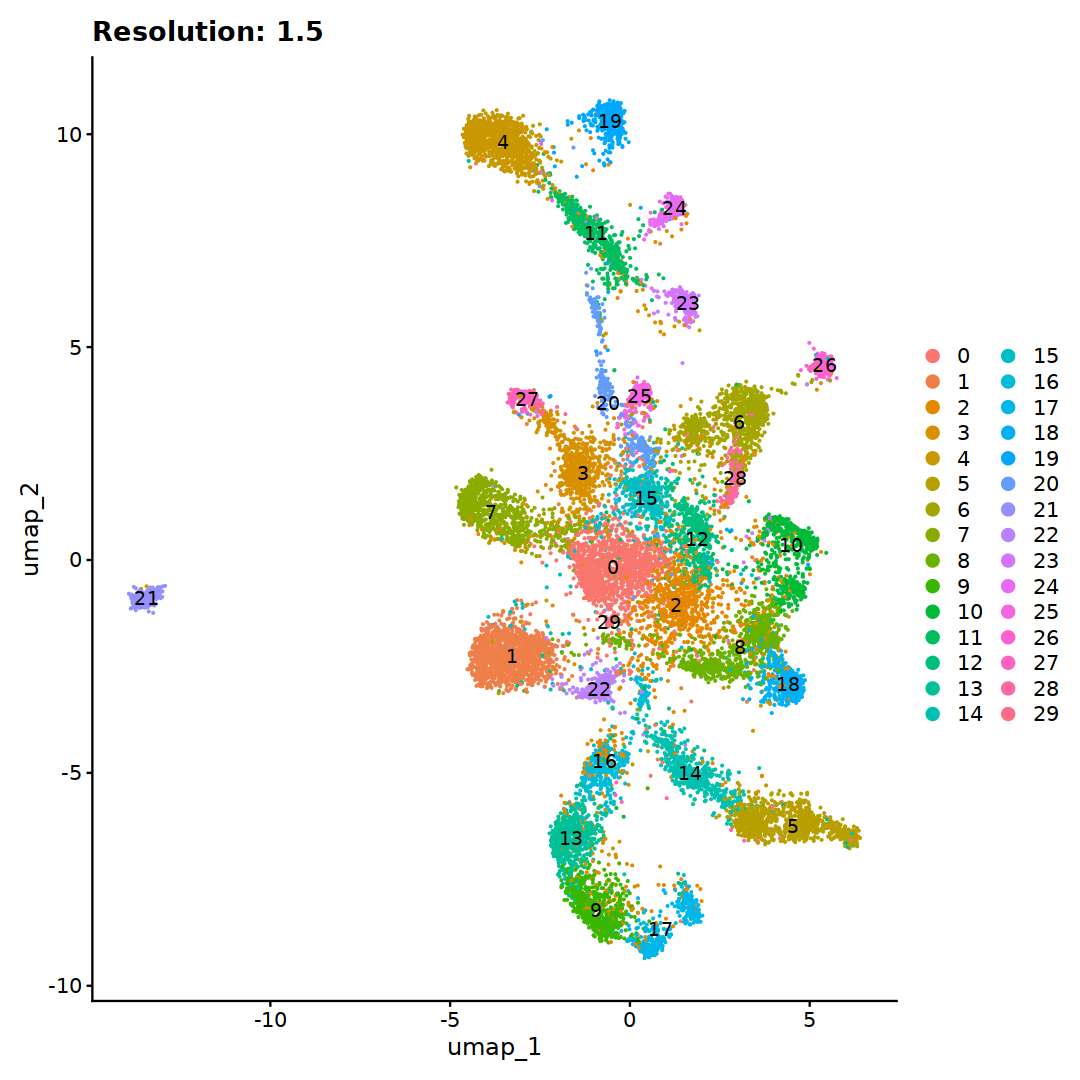

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 17369
Number of edges: 814337

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8439
Number of communities: 37
Elapsed time: 3 seconds


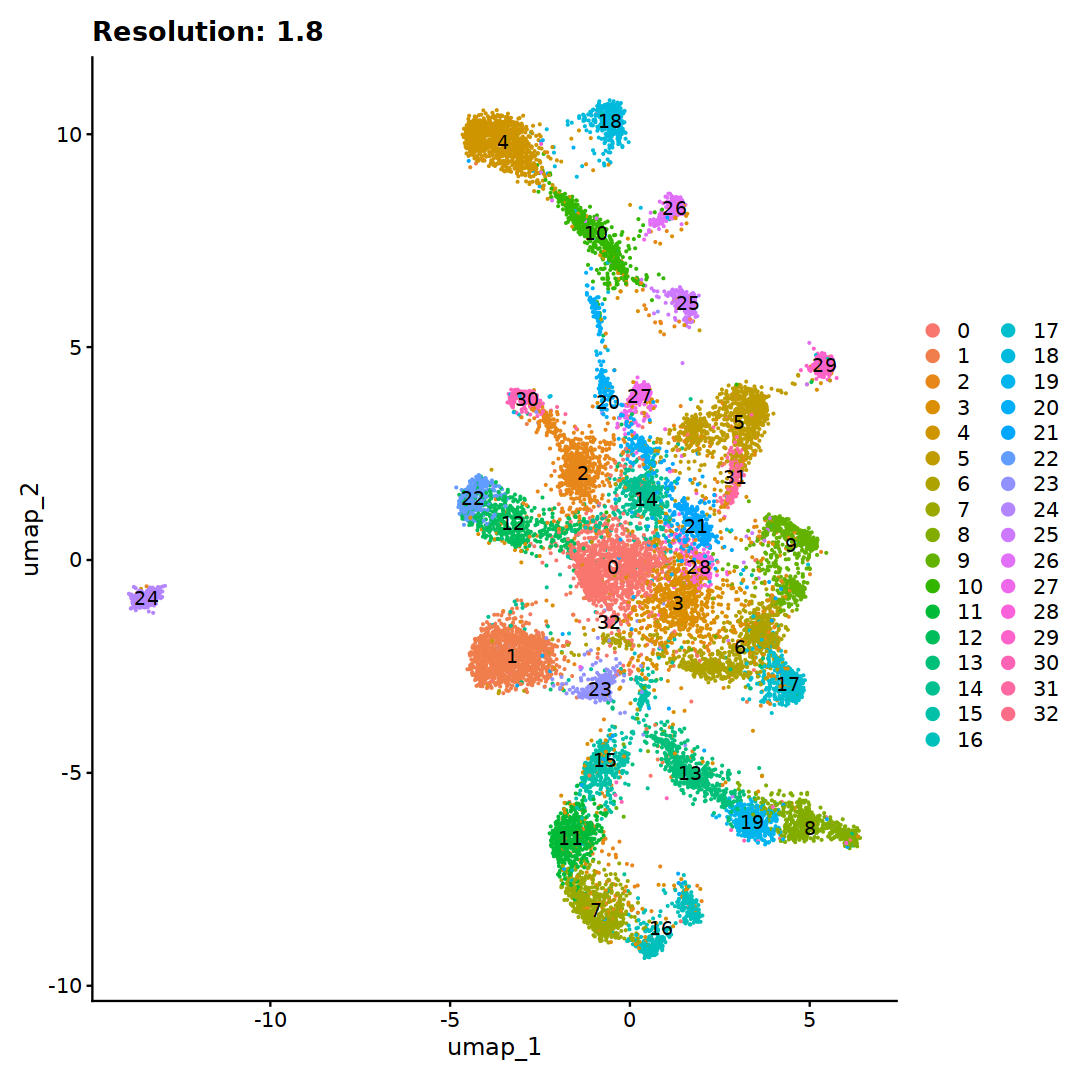

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 17369
Number of edges: 814337

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8257
Number of communities: 38
Elapsed time: 3 seconds


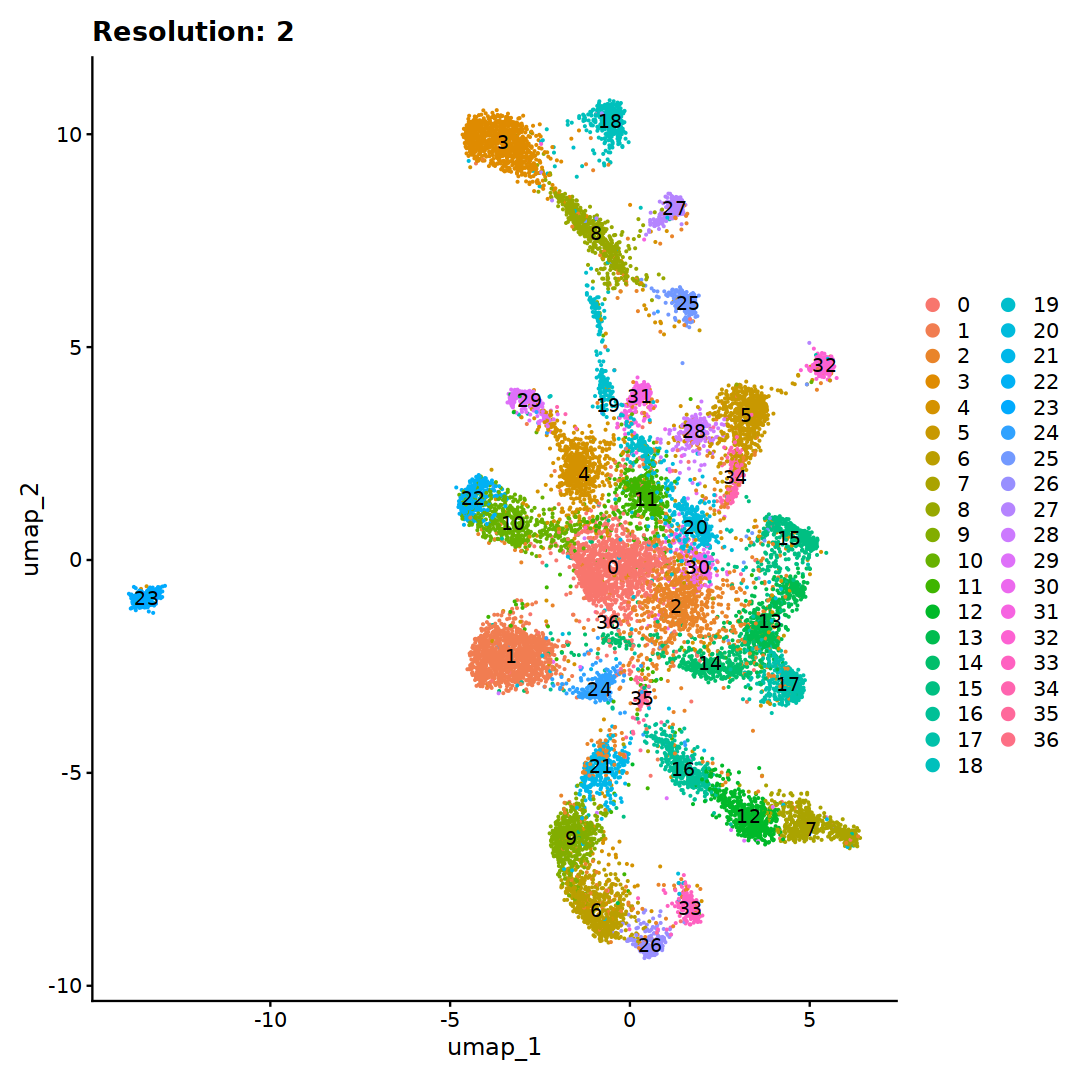

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 17369
Number of edges: 814337

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8087
Number of communities: 41
Elapsed time: 3 seconds


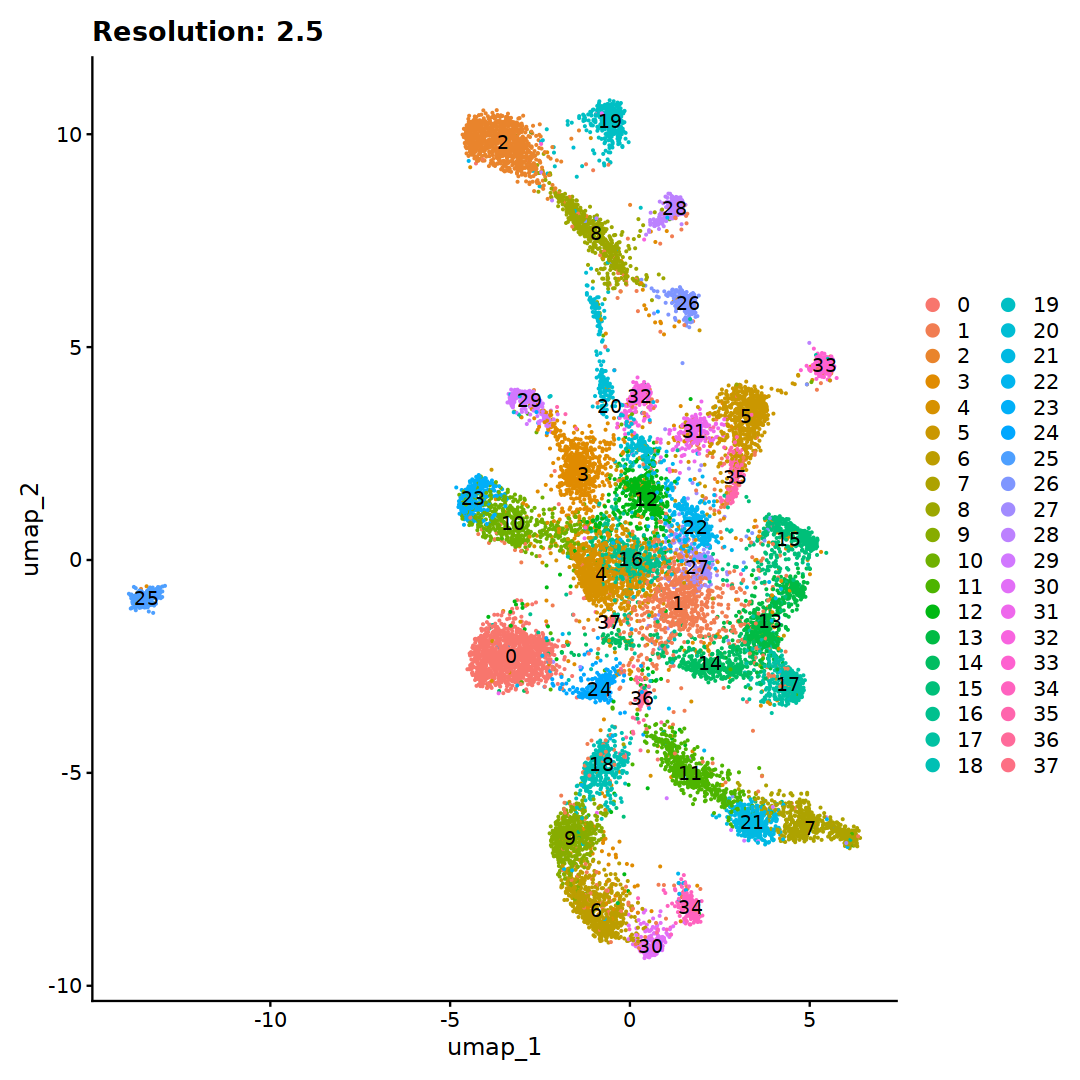

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 17369
Number of edges: 814337

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7921
Number of communities: 45
Elapsed time: 3 seconds


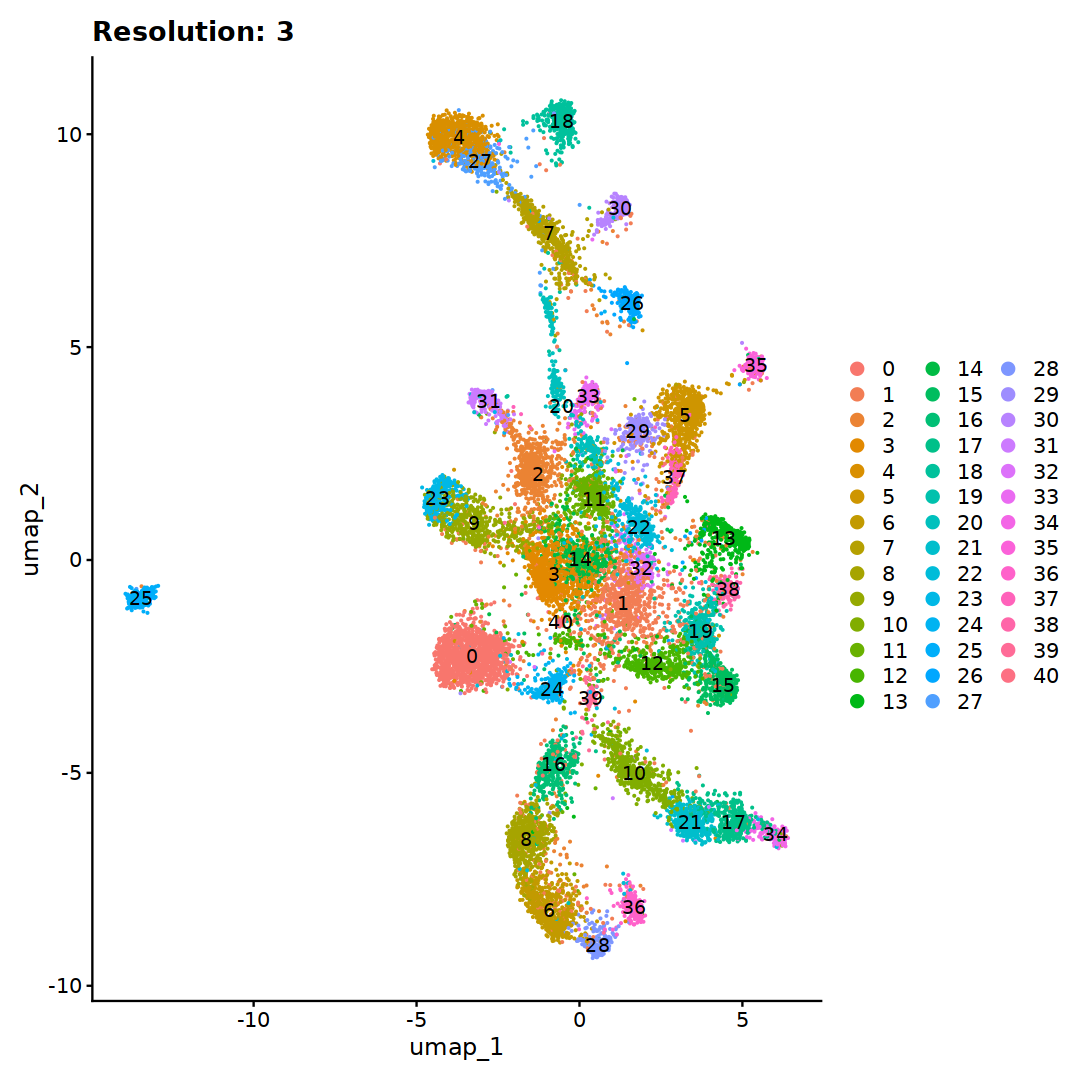

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 17369
Number of edges: 814337

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7769
Number of communities: 45
Elapsed time: 3 seconds


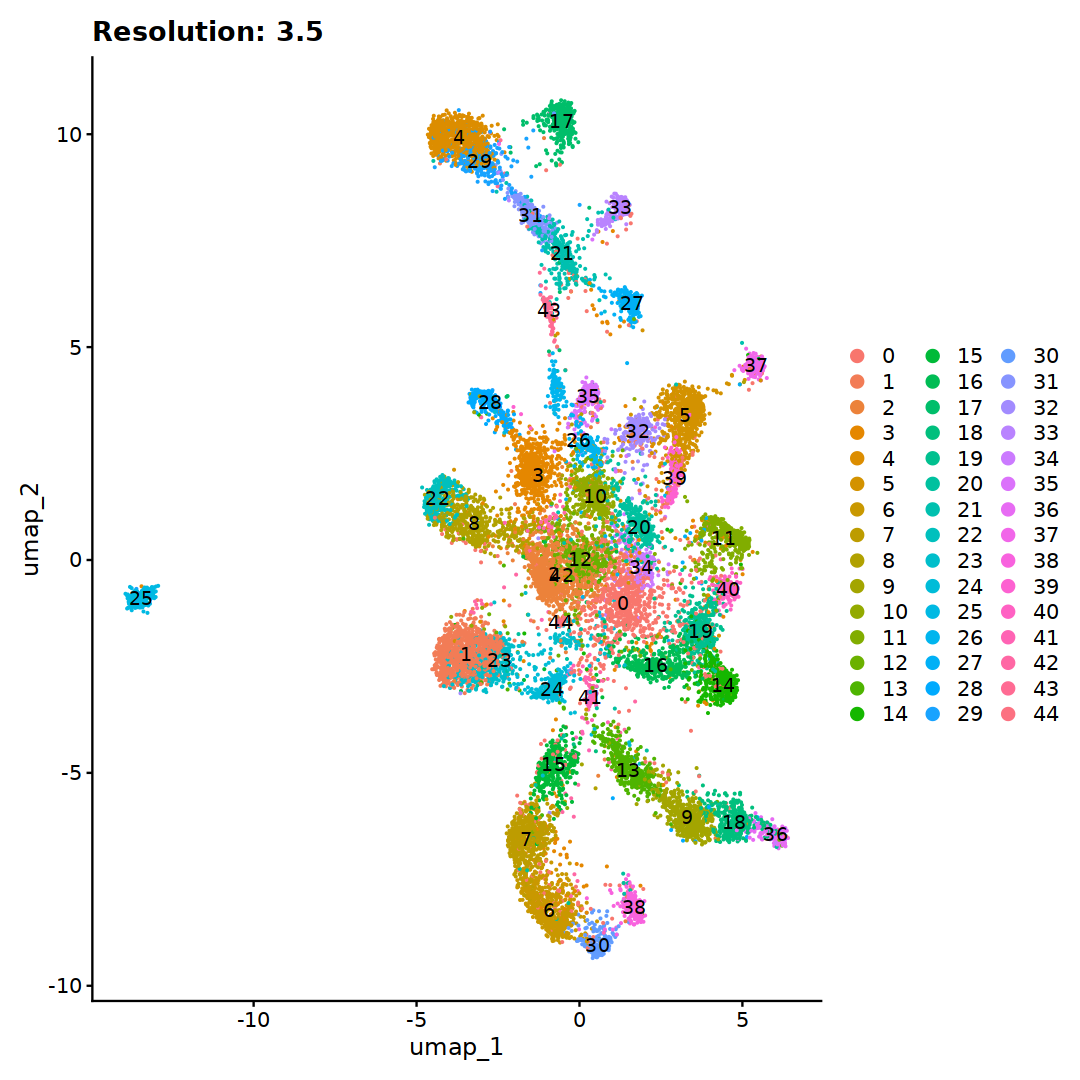

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 17369
Number of edges: 814337

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7627
Number of communities: 47
Elapsed time: 3 seconds


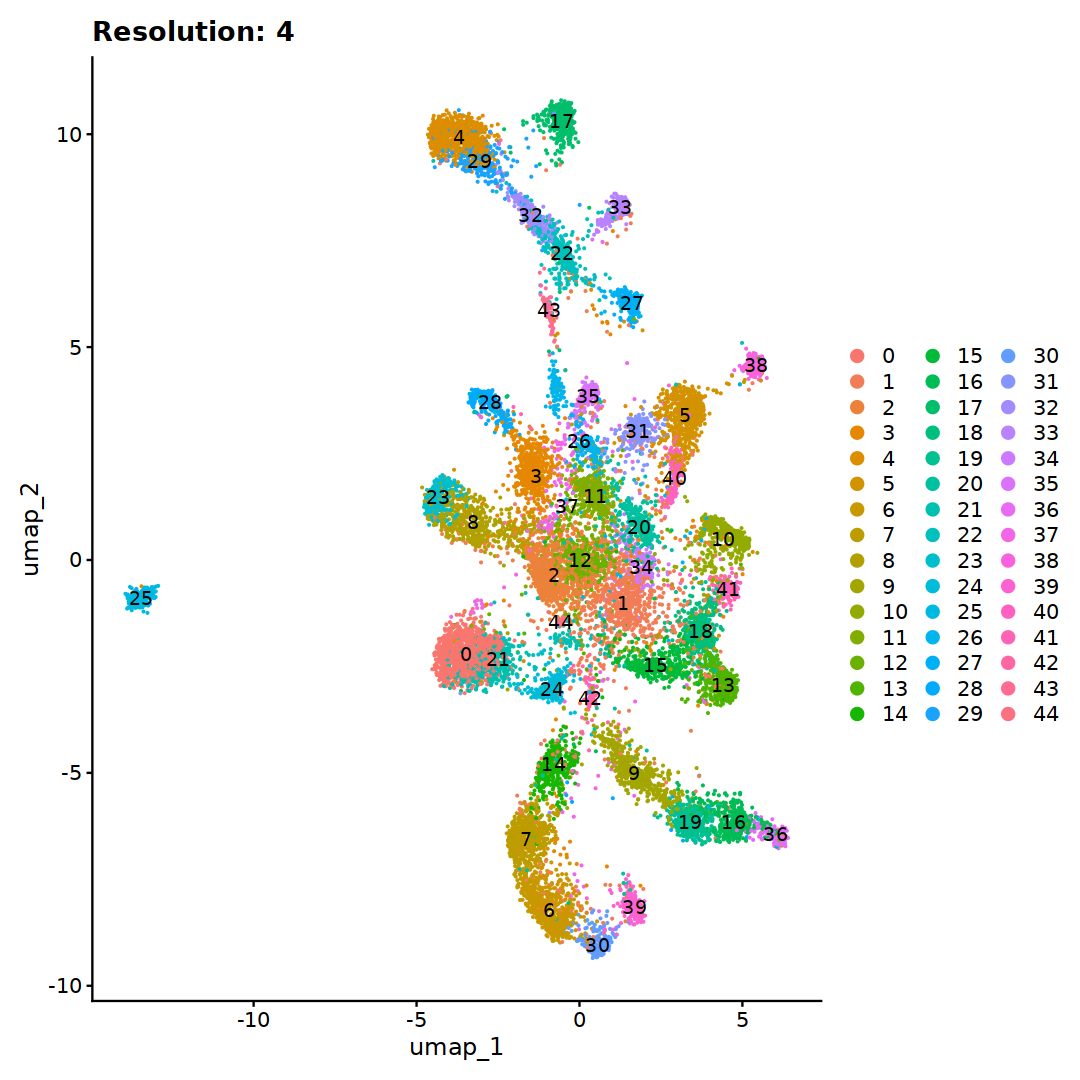

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 17369
Number of edges: 814337

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7496
Number of communities: 47
Elapsed time: 3 seconds


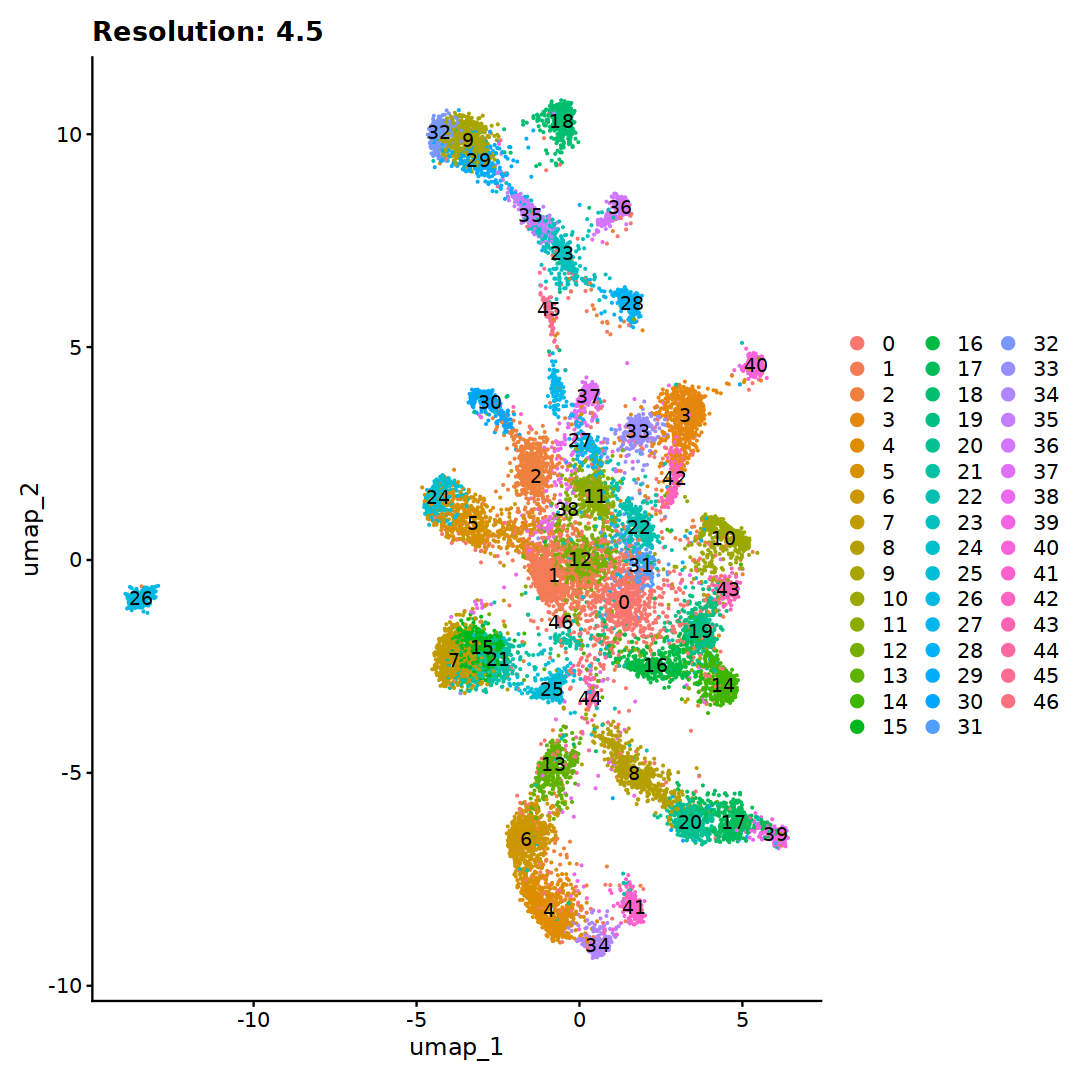

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 17369
Number of edges: 814337

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7364
Number of communities: 49
Elapsed time: 3 seconds


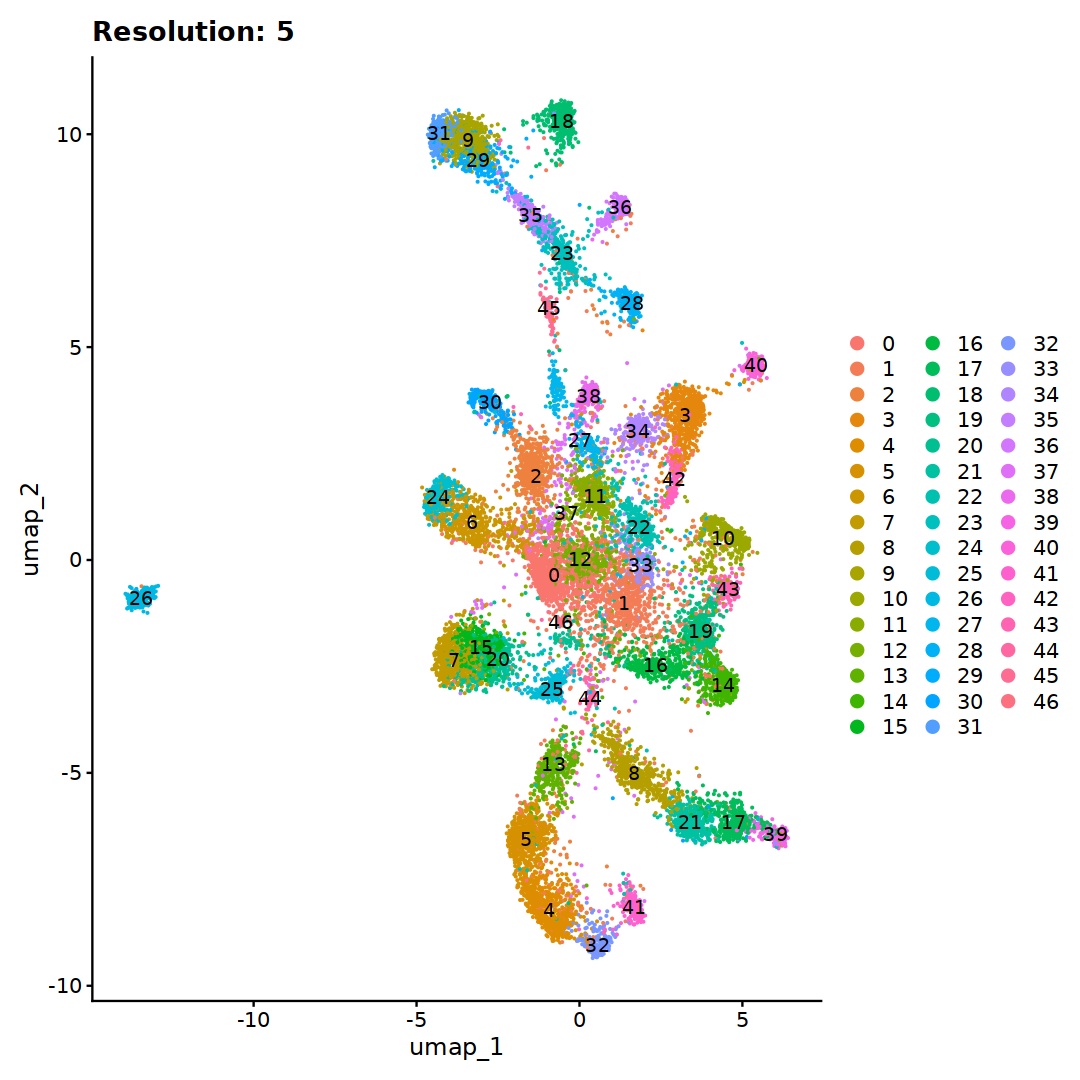

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 17369
Number of edges: 814337

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7239
Number of communities: 50
Elapsed time: 4 seconds


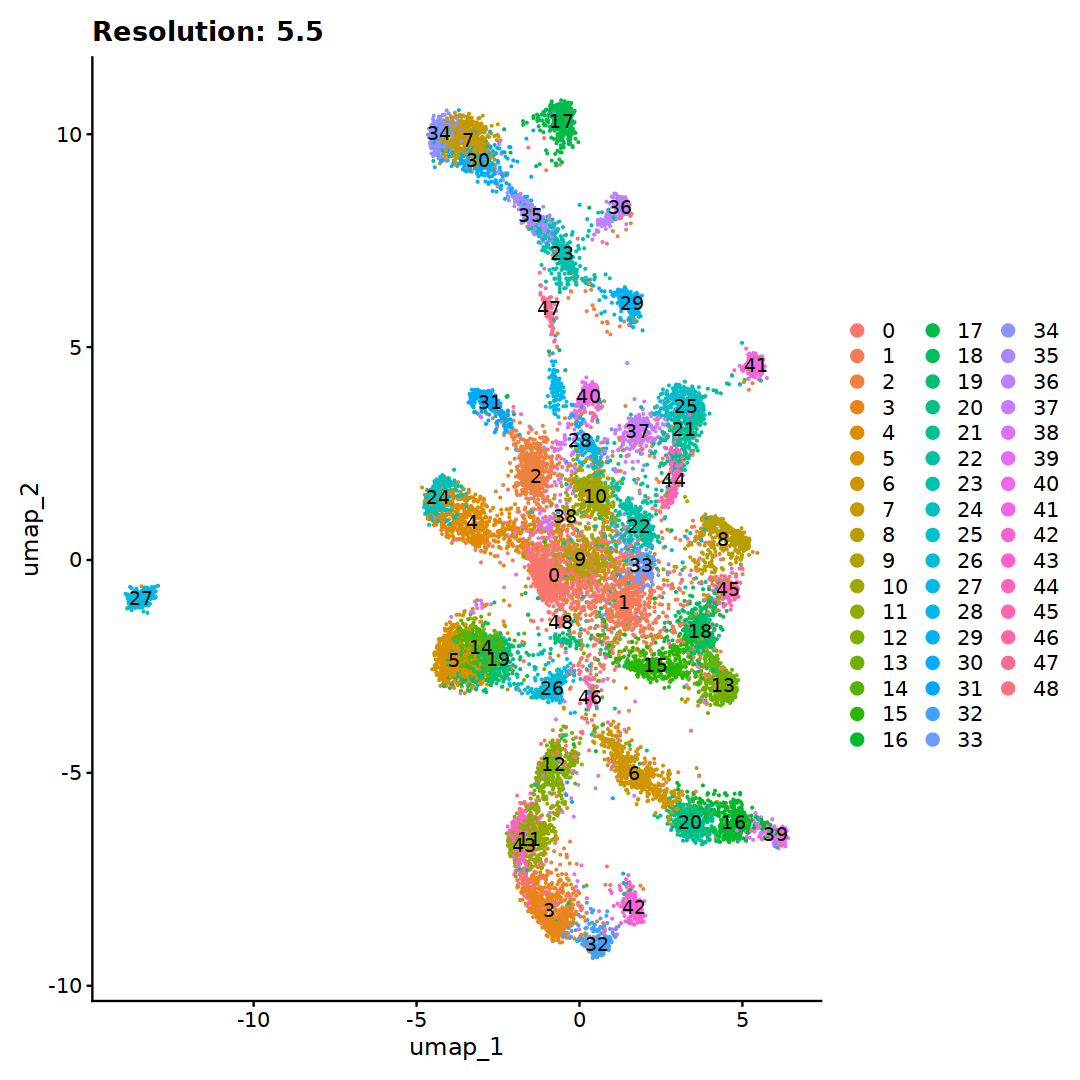

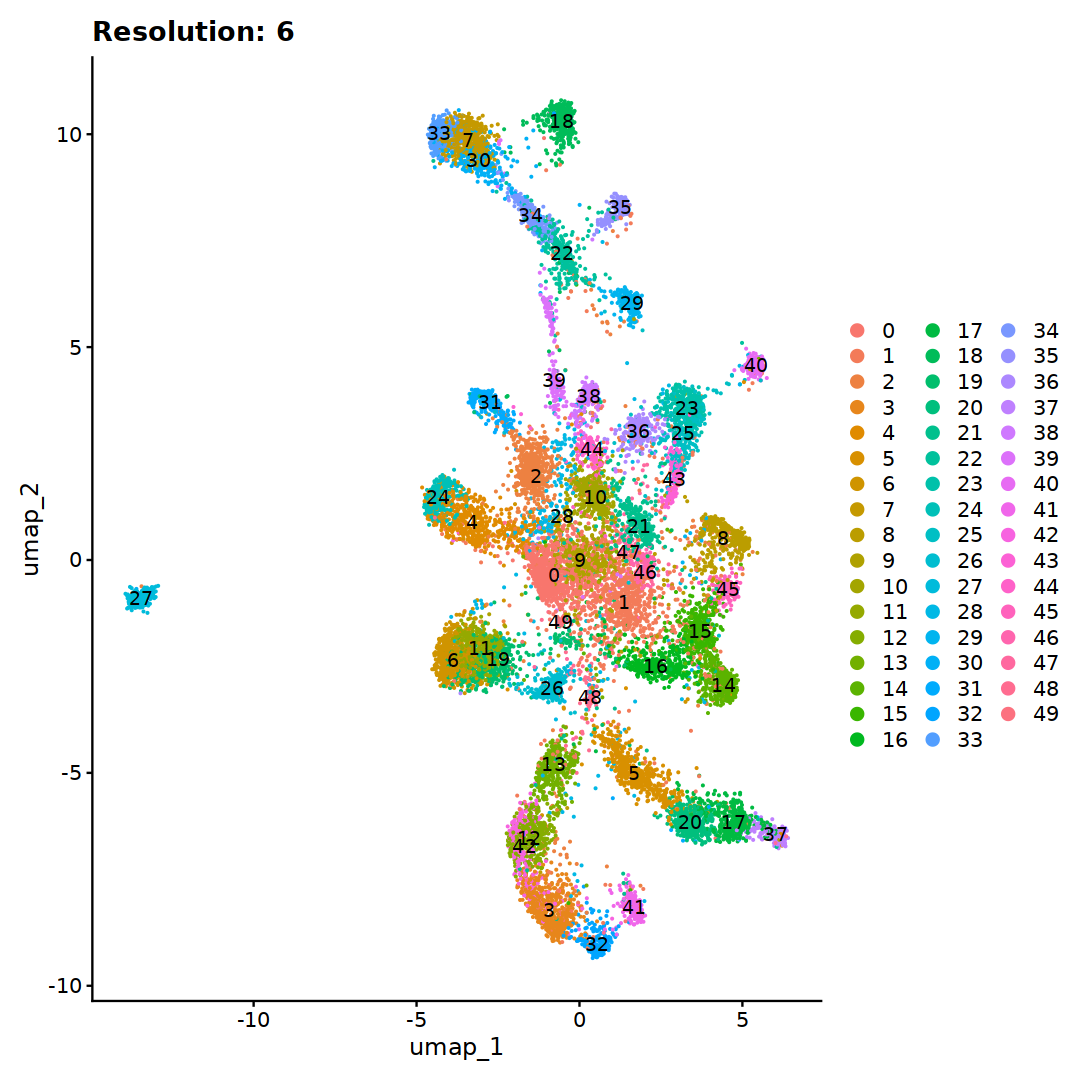

In [ ]:
library(Seurat)
library(clustree)
library(dplyr)

# UMAP
TeO_GABA <- RunUMAP(TeO_GABA, dims = 1:40, verbose = TRUE)

cluster_results <- list()

# re-cluster
for (i in c(0.3,0.6,0.9,1,1.2,1.5, 1.8, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6)) {
  TeO_GABA <- FindClusters(TeO_GABA, resolution = i)
  
  res_col_name <- paste0("integrated_snn_res.", i)
  new_col_name <- paste0("GABA_", res_col_name)
  colnames(TeO_GABA@meta.data)[colnames(TeO_GABA@meta.data) == res_col_name] <- new_col_name
  
  cluster_results[[paste0("resolution_", i)]] <- TeO_GABA
  
  plot <- DimPlot(TeO_GABA, reduction = "umap", label = TRUE) + 
    labs(title = paste0("Resolution: ", i))
  print(plot)
}

In [ ]:
saveRDS(TeO_GABA, file = '/data/work/5month_TeO/10_budgerigar_brain_5months_TeO_GABA_unannotated.rds')